# K-Means Project

El algoritmo K-Means es una técnica de agrupamiento que tiene como objetivo dividir un conjunto de datos en K clusters (definido como parámetro de entrada), de manera que los puntos dentro de cada clúster sean similares entre sí y diferentes a los puntos en otros clústeres.



## Sistema de agrupación de casas

Queremos ser capaces de clasificar casas según su la región en la que se encuentren y del ingreso medio. Para ello, utilizaremos el famoso conjunto de datos California Housing. Se construyó utilizando los datos del censo de California de 1990. Contiene una fila por grupo de bloques censales. Un grupo de bloques es la unidad geográfica más pequeña para la que se publican datos del censo de USA.

In [1]:
#Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Cargamos el dataframe
dataframe = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv')

dataframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [6]:
# Nos quedamos con las columnas que nos interesan

columnas = ['Latitude', 'Longitude', 'MedInc']

dataframe = dataframe[columnas]

dataframe.head()

,Latitude,Longitude,MedInc
0,37.88,-122.23,8.3252
1,37.86,-122.22,8.3014
2,37.85,-122.24,7.2574
3,37.85,-122.25,5.6431
4,37.85,-122.25,3.8462


In [9]:
# Dividimos el dataset en train y test

from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(dataframe, test_size = 0.2, random_state = 0) # El código divide el DataFrame en conjuntos de entrenamiento y prueba,
                                                                                 # asignando el 80% de las muestras al conjunto de entrenamiento (X_train)
                                                                                 # y el 20% de las muestras al conjunto de prueba (X_test).
                                                                                 # La semilla aleatoria se establece en 0 para garantizar
                                                                                 # que la división sea reproducible.

X_train.head()

,Latitude,Longitude,MedInc
12069,33.83,-117.55,4.2386
15925,37.73,-122.44,4.3898
11162,33.83,-118.00,3.9333
4904,34.01,-118.26,1.4653
4683,34.08,-118.36,3.1765


In [10]:
# Creamos el modelo K-Means

from sklearn.cluster import KMeans

model_unsup = KMeans(n_clusters = 6, n_init = 'auto', random_state = 0)
model_unsup.fit(X_train)

KMeans(n_clusters=6, n_init='auto', random_state=0)

In [11]:
# Insertamos los clusteres en el dataset de entrenamiento

y_train = list(model_unsup.labels_) # Con list() creamos una lista a partir de una secuencia iterable, como una tupla, un conjunto o una cadena.
                                    # El método labels_ se utiliza para obtener las etiquetas de clúster asignadas a cada muestra en el conjunto de datos.
                                    # Las etiquetas indican a qué clúster pertenece cada muestra.
X_train['cluster'] = y_train
X_train.head()

,Latitude,Longitude,MedInc,cluster
12069,33.83,-117.55,4.2386,4
15925,37.73,-122.44,4.3898,2
11162,33.83,-118.00,3.9333,0
4904,34.01,-118.26,1.4653,0
4683,34.08,-118.36,3.1765,0


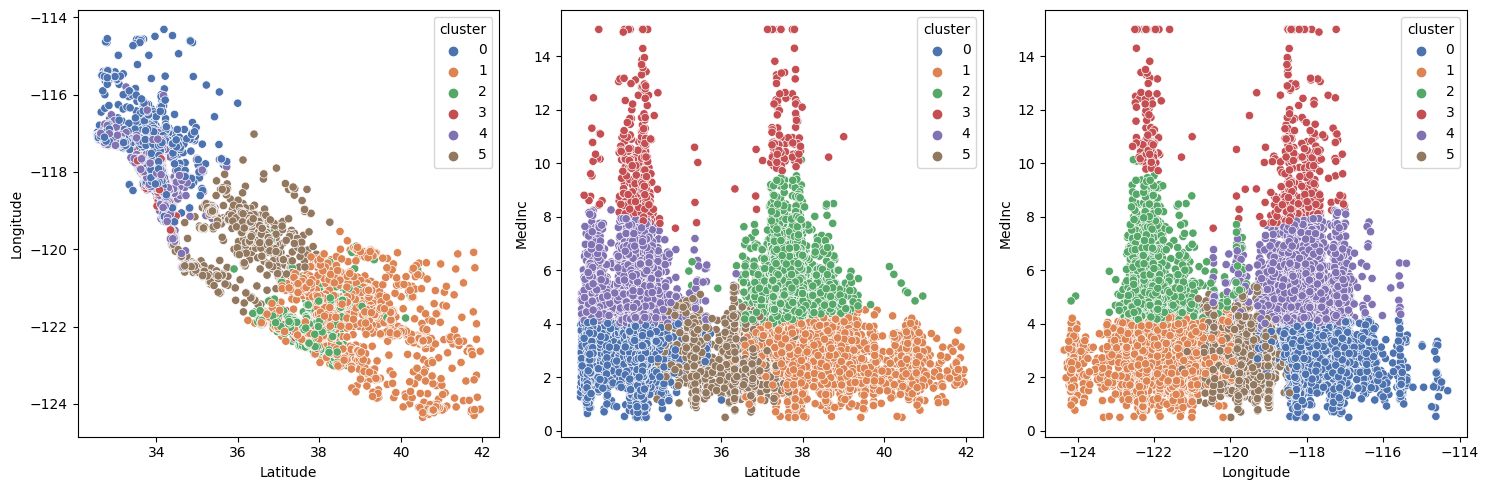

In [13]:
# Graficamos los resultados

fig, axis = plt.subplots(1, 3, figsize = (15, 5))

sns.scatterplot(ax = axis[0], data = X_train, x = 'Latitude', y = 'Longitude', hue = 'cluster', palette = 'deep')
sns.scatterplot(ax = axis[1], data = X_train, x = 'Latitude', y = 'MedInc', hue = 'cluster', palette = 'deep')
sns.scatterplot(ax = axis[2], data = X_train, x = 'Longitude', y = 'MedInc', hue = 'cluster', palette = 'deep')

plt.tight_layout()

plt.show()

In [14]:
# Predecimos usando el set de entrenamiento

y_test = list(model_unsup.predict(X_test))
X_test['cluster'] = y_test
X_test.head()

,Latitude,Longitude,MedInc,cluster
14740,32.58,-117.05,4.1518,4
10101,33.92,-117.97,5.7796,4
20566,38.65,-121.84,4.3487,2
2670,33.20,-115.60,2.4511,0
15709,37.79,-122.43,5.0049,2


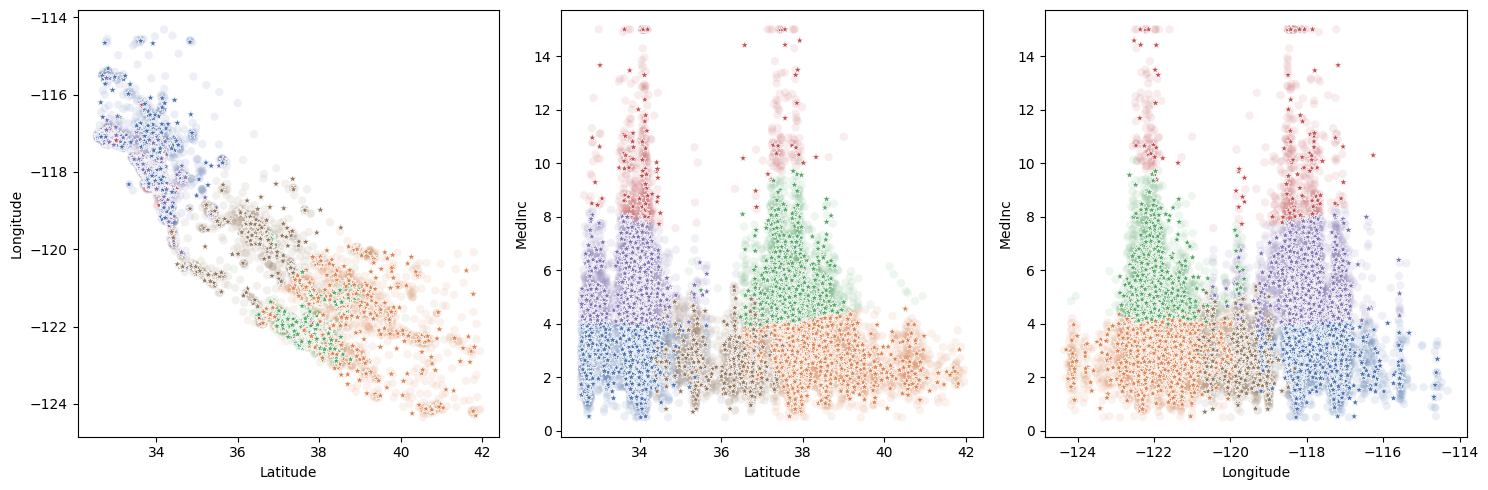

In [19]:
# Graficamos los resultados sobre las gráficas de antes

fig, axis = plt.subplots(1, 3, figsize = (15, 5))

sns.scatterplot(ax = axis[0], data = X_train, x = "Latitude", y = "Longitude", hue = "cluster", palette = "deep", alpha  = 0.1)
sns.scatterplot(ax = axis[1], data = X_train, x = "Latitude", y = "MedInc", hue = "cluster", palette = "deep", alpha  = 0.1)
sns.scatterplot(ax = axis[2], data = X_train, x = "Longitude", y = "MedInc", hue = "cluster", palette = "deep", alpha  = 0.1)

sns.scatterplot(ax = axis[0], data = X_test, x = "Latitude", y = "Longitude", hue = "cluster", palette = "deep", marker = "*")
sns.scatterplot(ax = axis[1], data = X_test, x = "Latitude", y = "MedInc", hue = "cluster", palette = "deep", marker = "*")
sns.scatterplot(ax = axis[2], data = X_test, x = "Longitude", y = "MedInc", hue = "cluster", palette = "deep", marker = "*")

plt.tight_layout()

for ax in axis:
    ax.legend([],[], frameon=False)

plt.show()

Los resultados son bastante parecidos, por lo que el modelo es fiable a la hora de predecir a qué cluster pertenece cada punto de entrenamiento.

In [20]:
# Entrenamos un modelo supervisado de clasificación

# Usamos un Decision Tree porque es una gran alternativa a la hora de categorizar elementos de acuerdo con sus características intrínsecas cuando
# no hay una clara relación lineal entre sus variables. Además, no es necesario estandarizar los valores.

from sklearn.tree import DecisionTreeClassifier

model_sup = DecisionTreeClassifier(random_state = 0)
model_sup.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

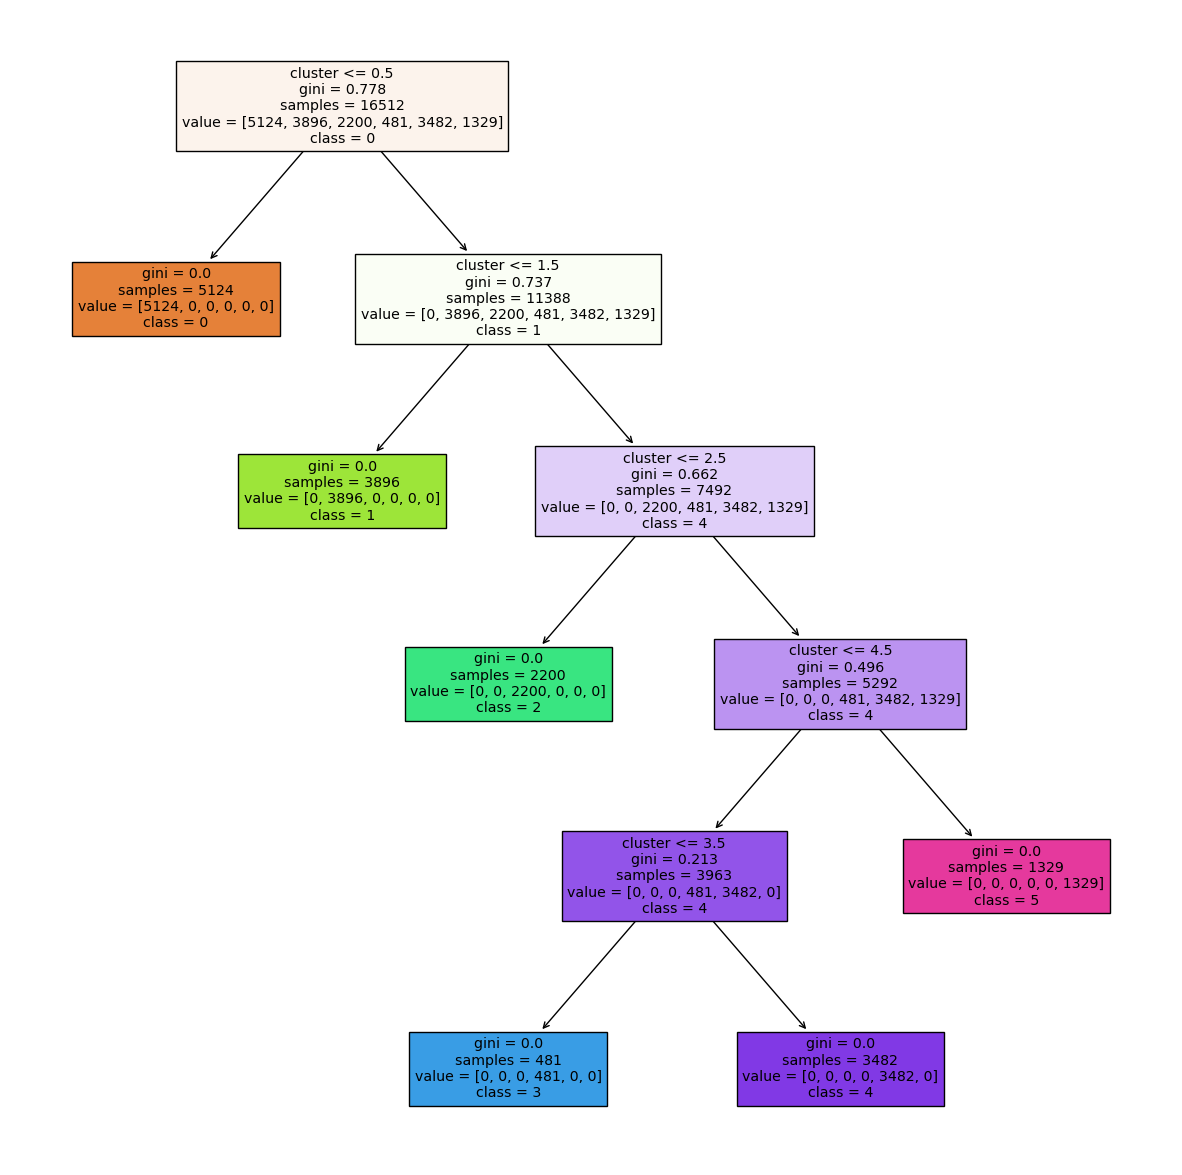

In [21]:
from sklearn import tree

fig = plt.figure(figsize=(15,15))

tree.plot_tree(model_sup, feature_names = list(X_train.columns), class_names = ["0", "1", "2", "3", "4", "5"], filled = True)

plt.show()

In [22]:
y_pred = model_sup.predict(X_test)
y_pred

array([4, 4, 2, ..., 1, 2, 0], dtype=int32)

In [23]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

1.0